In [58]:
using RDatasets, Clustering, Plots,Distances,StatsPlots,Statistics
iris = dataset("datasets", "iris"); # load the data
features = collect(Matrix(iris[:, 1:4])'); # features to use for clustering


2

"k-means: 0.6810461692117465"

"hiearcichal: 0.686735073276978"

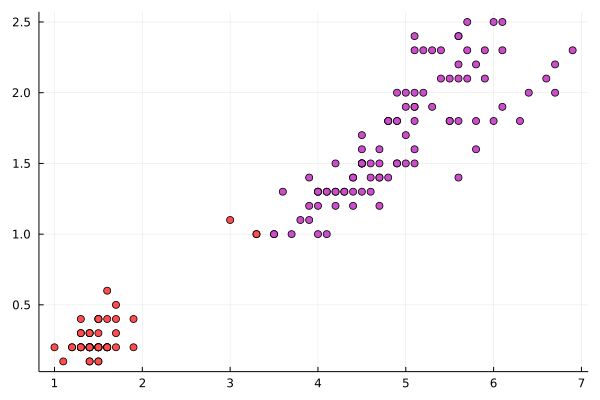

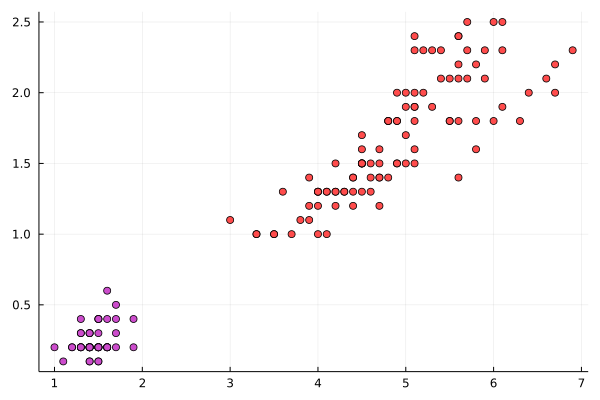

In [215]:
k=5
for k in 2:2
    display(k)
    R = Clustering.kmeans(features, k); # run K-means for the 3 clusters
    a = Clustering.assignments(R) # get the assignments of points to clusters
    c = Clustering.counts(R) # get the cluster sizes
    M = R.centers; # get the cluster centers


    ############################

    D=Distances.pairwise(Euclidean(), features, dims=2)
    # hc = hclust(D, linkage=:single)
    hc = hclust(D, linkage=:ward_presquared)
    # display(Plots.plot(hc))

    # hc = hclust(D, linkage=:ward_presquared,branchorder=:optimal)
    # display(Plots.plot(hc))
    # display(plot(hc.heights))

    # cutree(hc; k=3, h=)
    a1=cutree(hc; k=k)


    display("k-means: $(mean(silhouettes(a, D)))")
    display("hiearcichal: $(mean(silhouettes(a1, D)))")

    # plot with the point color mapped to the assigned cluster index
    display(scatter(iris.PetalLength, iris.PetalWidth, marker_z=a,color=:lightrainbow, legend=false))
    display(scatter(iris.PetalLength, iris.PetalWidth, marker_z=a1,color=:lightrainbow, legend=false))
end

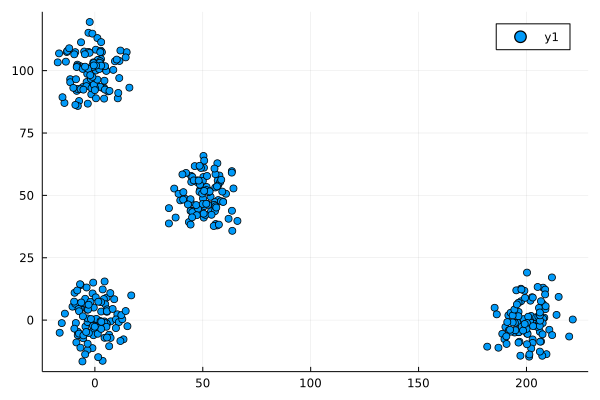

In [212]:
using Distributions
using LinearAlgebra
# srand(1234)
function makeDataOne()
    groupOne = rand(MvNormal([0,0], 25 * UniformScaling(2.)), 100)
    groupTwo = rand(MvNormal([50,50], 25 * UniformScaling(2.)), 100)
    groupThree= rand(MvNormal([0,100], 25 * UniformScaling(2.)), 100)
    groupFour= rand(MvNormal([200,0], 25 * UniformScaling(2.)), 100)
    data = hcat(groupOne, groupTwo, groupThree,groupFour)'
    return data
end
dataOne = makeDataOne()
scatter(dataOne[:,1],dataOne[:,2])

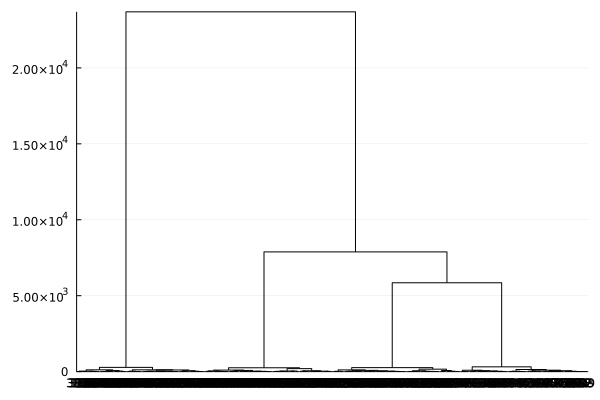

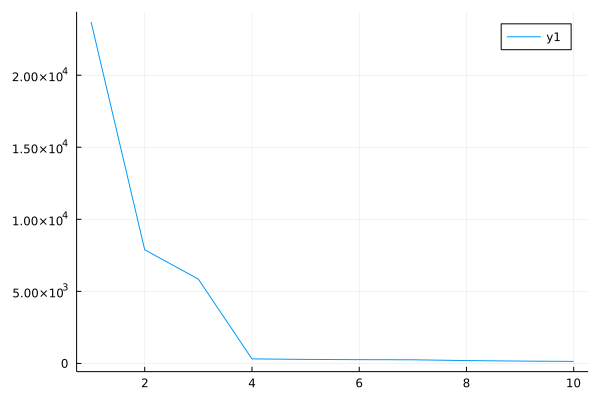

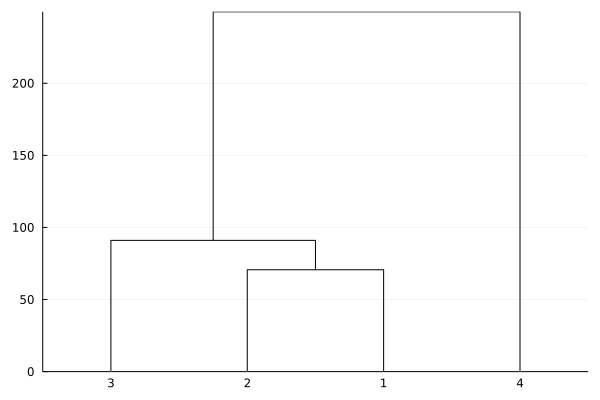

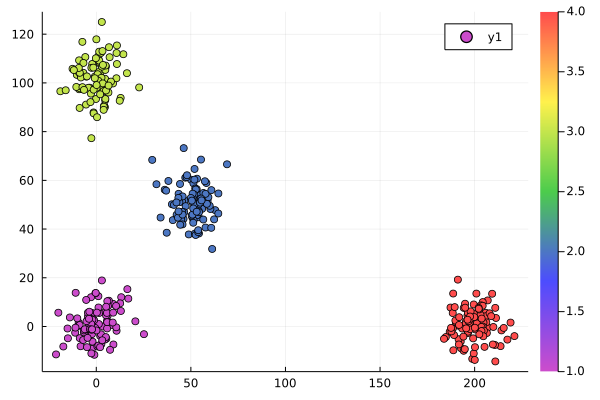

In [214]:
using GMT

data=features
data=makeDataOne()'

D=Distances.pairwise(Euclidean(), data, dims=2)
hc = hclust(D, linkage=:ward_presquared) # hc = hclust(D, linkage=:single,branchorder=:optimal)
display(Plots.plot(hc))

hcElbow=reverse(hc.heights)[1:10]
display(plot(1:(length(hcElbow)),hcElbow))
xy=hcat(1:(length(hcElbow)),hcElbow)
mapp=mapproject(xy, dist2line=(line=[xy[1:1, :]; xy[end:end, :]], unit=:cartesian))
nclust=(findmax(mapp[:,3])[2])

a1=cutree(hc; k=nclust)
centers=zeros(size(data)[1],nclust)
for i in 1:nclust
    R = Clustering.kmeans(data[:,a1.==i], 1); # run K-means
    M = R.centers; # get the cluster centers
    centers[:,i].=M[:]
end
D=Distances.pairwise(Euclidean(), centers, dims=2)
hc = hclust(D, linkage=:ward_presquared,branchorder=:optimal) # hc = hclust(D, linkage=:single,branchorder=:optimal)
display(Plots.plot(hc))
# display(scatter(iris.PetalLength, iris.PetalWidth, marker_z=a1,color=:lightrainbow))
display(scatter(data[1,:],data[2,:], marker_z=a1,color=:lightrainbow))

In [269]:
using Evolutionary
f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2 # Rosenbrock

f (generic function with 1 method)

In [270]:
x0 = [0.0, 0.0];
Evolutionary.optimize(f, x0, CMAES())



 * Status: success

 * Candidate solution
    Minimizer:  [0.9999912476827778, 0.9999824525592053]
    Minimum:    7.678695152722933e-11
    Iterations: 374

 * Found with
    Algorithm: (10,20)-CMA-ES

 * Convergence measures
    |f(x) - f(x')| = 1.2373447151481028e-15 ≤ 1.0e-12

 * Work counters
    Seconds run:   0.015 (vs limit Inf)
    Iterations:    374
    f(x) calls:    7480


In [ ]:
f2(x::AbstractVector) = [ x[1]-1,  (x[1])^2 ]

In [5]:
include("./julia/include/_topologyOptimization.jl")
using Evolutionary

Loaded Topology Optimization Library!


In [338]:
thetaD=30
function getStrainTheta1(x)
    theta=thetaD*pi/180;
    Θ,ratio=getStrain(x);

    return  [abs(theta-Θ),ratio]
end
x0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
res =Evolutionary.optimize(getStrainTheta1, x0, NSGA2())
xs=Evolutionary.minimizer(res)
for i in 1:length(xs)
    x=xs[i]
    display("thetaD $thetaD , Θ $(getStrain(x)[1]*180/pi), RATIO $(getStrain(x)[2])");
#     x1=x[1];y1=x[2];x2=x[3];y2=x[4];x3=x[5];y3=x[6];
#     Ue=[x1,y1,0,0,x2,y2,x3,y3]

#     points,pointsU=displayElementDeformation(10,Ue,order,true)
end

"thetaD 30 , Θ 18.753145350808854, RATIO -0.13830685468166232"

"thetaD 30 , Θ 12.219215800499246, RATIO -0.2739505038632159"

"thetaD 30 , Θ 2.0072487928655702, RATIO -0.3899265180225604"

"thetaD 30 , Θ 11.581962696000142, RATIO -0.29870998130124193"

"thetaD 30 , Θ 13.803624559406986, RATIO -0.16999778166951293"

In [9]:
thetaD =30
ratioD=0.5
function getStrainTheta(x)
    theta=thetaD*pi/180;
    Θ,ratio=getStrain(x);
    return abs(theta-Θ) +abs(ratio-ratioD)
end

x0 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0];
res =Evolutionary.optimize(getStrainTheta, x0, CMAES())
x=res.minimizer;
# Θ,ratio=getStrain(x);

display("thetaD $thetaD , Θ $(getStrain(x)[1]*180/pi), RATIO $(getStrain(x)[2])");


"thetaD 30 , Θ 30.000000000001897, RATIO 0.49999999999999056"

In [322]:
x[1]

-0.40552420235687775

In [323]:
# x=x/maximum(abs.(x))




"thetaD 30 , Θ 34.82167218584383, RATIO 0.7370804919151493"

LoadError: MethodError: no method matching getindex(::typeof(order), ::Int64)

In [303]:
schafferf2(x::AbstractVector) = [ x[1]^2,  (x[1]-2)^2 ]
rng = StableRNG(42)
opts = Evolutionary.Options(rng=rng, iterations=500)
Random.seed!(rng, 1)
result = Evolutionary.optimize(schafferf2, ()->100randn(rng,1), NSGA2())


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Pareto front: 48 elements
    Iterations:   1000

 * Found with
    Algorithm: NSGA-II[P=50,x=0.9,μ=0.1]

 * Convergence measures
    |GD(P) - GD(P')|   = 0.9512074521652977 ≰ 1.0e-5
    |IGD(P) - IGD(P')| = 11666.439388807228 ≰ 1.0e-5

 * Work counters
    Seconds run:   1.833 (vs limit Inf)
    Iterations:    1000
    f(x) calls:    50050


In [290]:
using StableRNGs, Random

In [ ]:
()->100randn(rng,1)

In [312]:
schafferf2(x::AbstractVector) = [ x[1]^2,  (x[1]-2)^2 ]
x0=[1.]
result = Evolutionary.optimize(schafferf2, x0, NSGA2())
Evolutionary.minimizer(result)

50-element Vector{Vector{Float64}}:
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 ⋮
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]
 [1.0]

37-element Vector{Vector{Float64}}:
 [1.3132332747014666]
 [0.502499313326859]
 [1.3357505952535738]
 [0.6919794185869332]
 [0.014330111630702344]
 [0.23982060949178735]
 [1.6599295651214137]
 [0.9631682381924519]
 [1.8176666455447839]
 [0.09410781568099391]
 [0.33358221099979]
 [0.23723589053564245]
 [0.5021699267150713]
 ⋮
 [1.2858285323539707]
 [0.5243455676574436]
 [0.29947889288428003]
 [0.431665079469863]
 [1.7815306028245206]
 [0.4504635277942166]
 [0.14578803005139485]
 [0.4969437604162824]
 [0.2294404064026238]
 [0.7472922357162397]
 [0.28788335200445697]
 [0.17176964716017157]

In [287]:
println("NSGA2:2RLT:SBX:PLM => F: $(minimum(result)), C: $(Evolutionary.iterations(result))")


NSGA2:2RLT:SBX:PLM => F: NaN, C: 500


In [291]:
isnan(Evolutionary.minimum(result))

true

In [292]:
mvs = vcat(Evolutionary.minimizer(result)...)

50-element Vector{Float64}:
 1.5946495962733165
 1.4811176908714718
 1.1766761857807544
 1.2643458759837944
 1.3175454411317449
 0.8074897244453236
 0.9121101479083735
 0.8308082404271275
 0.4004492233318727
 1.2565673535193551
 0.9088625105308294
 0.7217118963163537
 0.9323954671617656
 ⋮
 0.7507369922850495
 0.8859496249863059
 0.701148256724513
 0.8323837236402688
 0.16233620913327118
 0.4758092225918217
 1.3989129545887868
 2.053753087703595
 0.8310626721876067
 1.2758322538868643
 1.3933359958834444
 1.254137363045436

In [293]:
sum(0 .<= mvs .<= 2)/length(mvs) >= 0.8

true

In [300]:
()->10randn(rng,1)

#9 (generic function with 1 method)

In [296]:
function schafferf2!(F, x::AbstractVector) # in-place update
    F[1] = x[1]^2
    F[2] = (x[1]-2)^2
    F
end
Random.seed!(rng, 42)
result = Evolutionary.optimize(schafferf2!, zeros(2), ()->10randn(rng,1), NSGA2(), opts)



 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Pareto front: 50 elements
    Iterations:   500

 * Found with
    Algorithm: NSGA-II[P=50,x=0.9,μ=0.1]

 * Convergence measures
    |GD(P) - GD(P')|   = 0.23153216763173062 ≰ 1.0e-5
    |IGD(P) - IGD(P')| = 3.0143722871844254 ≰ 1.0e-5

 * Work counters
    Seconds run:   0.773 (vs limit Inf)
    Iterations:    500
    f(x) calls:    25050


In [297]:
println("NSGA2:2RLT:SBX:PLM => F: $(minimum(result)), C: $(Evolutionary.iterations(result))")

NSGA2:2RLT:SBX:PLM => F: NaN, C: 500


In [298]:
isnan(Evolutionary.minimum(result))
    

true

In [299]:
mvs = vcat(Evolutionary.minimizer(result)...)
sum(0 .<= mvs .<= 2)/length(mvs) >= 0.8

true

In [301]:
sum(0 .<= mvs .<= 2)/length(mvs)

1.0